Revenue Prediction
==================
In this project the goal is to predict movies revenue using their features. revenue is given by ( box_office - budget ) so the main goal is to predict box office. 

1. Prepare and preprocess the given data. 

2. After exploring data find, select and especially create new features. ignore others.

3. Prepare features to feed the model. 

4. Select and try different models.

5. Document and report each step using relative plots and a brief explanation. finally report the best suited model and justify why did it performed well.



- Keep in mind that in this task accuracy itself only has only part of score.

- Hint: to create new features you can use credit attributes. Think of it this way, what affects box office?  

**Tools** 

importing useful tools and libraries. you may use any other library as well.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.ticker as ticker
%matplotlib inline

# تنظیمات نمایش
pd.set_option('display.max_columns', None)

In [120]:
np.random.seed(101)

In [121]:
# Your project struct must look like this,


# |── Name_SID.zip
# │   ├── data
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   ├── *.ipynb
# │   ├── document.pdf

df_movies = pd.read_csv(r"data/rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv(r"data/rotten_tomatoes_5000_credits.csv")

print("MOVIES\n--------------------------------------------\n")
print(df_movies.head(10))
print("CREDIT\n--------------------------------------------\n")
print(df_credit.head(10))


MOVIES
--------------------------------------------

   rt_production_budget                                          rt_genres  \
0             237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1             300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2             245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3             250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4             260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
5             258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
6             260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
7             280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
8             250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
9             250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                          rt_website  rt_movie_id  \
0                  

In [122]:
# Merging dataframes on 'rt_movie_id'
df = df_movies.merge(df_credit, on='rt_movie_id')

# Displaying the first few rows of the merged dataframe
print("Merged DataFrame:\n")
display(df.head())

# Dropping movies with zero box office revenue
df = df[df['rt_box_office'] != 0]

# Confirming the removal
print(f"Number of movies after removing zero box office: {df.shape[0]}")


Merged DataFrame:



,rt_production_budget,rt_genres,rt_website,rt_movie_id,rt_keywords,rt_original_language,rt_original_title,rt_synopsis,rt_audience_score,rt_studios,rt_production_countries,rt_release_date,rt_box_office,rt_runtime,rt_languages,rt_release_status,rt_tagline,rt_title_x,rt_critics_score,rt_review_count,rt_title_y,rt_actors,rt_staff
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Number of movies after removing zero box office: 3376


In [123]:
# Extracting release year from 'rt_release_date'
df['release_year'] = pd.to_datetime(df['rt_release_date'], errors='coerce').dt.year

# Dropping rows with invalid release dates
df = df.dropna(subset=['release_year'])

# Converting release_year to integer
df['release_year'] = df['release_year'].astype(int)

# Displaying the first few rows after extracting release_year
print("DataFrame after extracting release_year:\n")
display(df[['rt_release_date', 'release_year']].head())


DataFrame after extracting release_year:



,rt_release_date,release_year
0,2009-12-10,2009
1,2007-05-19,2007
2,2015-10-26,2015
3,2012-07-16,2012
4,2012-03-07,2012


In [124]:
# Displaying missing values before cleaning
print("Missing values in each column before cleaning:")
print(df.isnull().sum())


Missing values in each column before cleaning:
rt_production_budget          0
rt_genres                     0
rt_website                 1980
rt_movie_id                   0
rt_keywords                   0
rt_original_language          0
rt_original_title             0
rt_synopsis                   0
rt_audience_score             0
rt_studios                    0
rt_production_countries       0
rt_release_date               0
rt_box_office                 0
rt_runtime                    0
rt_languages                  0
rt_release_status             0
rt_tagline                  282
rt_title_x                    0
rt_critics_score              0
rt_review_count               0
rt_title_y                    0
rt_actors                     0
rt_staff                      0
release_year                  0
dtype: int64


In [125]:
# Dropping columns with more than 50% missing values
# threshold = len(df) * 0.5
# df = df.dropna(thresh=threshold, axis=1)

# Filling remaining missing values
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column] = df[column].fillna(df[column].mean())
    else:
        if df[column].dtype == 'object':
            # For object types, fill with mode if available
            if not df[column].mode().empty:
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                df[column] = df[column].fillna('Unknown')

# Displaying missing values after cleaning
print("\nMissing values in each column after cleaning:")
print(df.isnull().sum())



Missing values in each column after cleaning:
rt_production_budget       0
rt_genres                  0
rt_website                 0
rt_movie_id                0
rt_keywords                0
rt_original_language       0
rt_original_title          0
rt_synopsis                0
rt_audience_score          0
rt_studios                 0
rt_production_countries    0
rt_release_date            0
rt_box_office              0
rt_runtime                 0
rt_languages               0
rt_release_status          0
rt_tagline                 0
rt_title_x                 0
rt_critics_score           0
rt_review_count            0
rt_title_y                 0
rt_actors                  0
rt_staff                   0
release_year               0
dtype: int64


In [126]:
# Function to safely extract lists from JSON-like strings
def safe_extract(column):
    def extract_func(x):
        try:
            return [item['name'] for item in ast.literal_eval(x)]
        except:
            return []
    return df[column].apply(extract_func)

# Extracting genres
df['genres_list'] = safe_extract('rt_genres')

# Extracting production countries
df['countries_list'] = safe_extract('rt_production_countries')

# Extracting languages
df['languages_list'] = safe_extract('rt_languages')

# Extracting actors
def extract_actors(actors_str):
    try:
        return [actor['name'] for actor in ast.literal_eval(actors_str)]
    except:
        return []

df['actors_list'] = df['rt_actors'].apply(extract_actors)

# Displaying the extracted features
print("Extracted Features:\n")
display(df[['rt_genres', 'genres_list', 'rt_production_countries', 'countries_list', 'rt_languages', 'languages_list', 'rt_actors', 'actors_list']].head())


Extracted Features:



,rt_genres,genres_list,rt_production_countries,countries_list,rt_languages,languages_list,rt_actors,actors_list
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Fantasy, Science Fiction]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[United States of America, United Kingdom]","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[English, Español]","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[Adventure, Fantasy, Action]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",[United States of America],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",[English],"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Crime]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[United Kingdom, United States of America]","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...","[Français, English, Español, Italiano, Deutsch]","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[Action, Crime, Drama, Thriller]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",[United States of America],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",[English],"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[Christian Bale, Michael Caine, Gary Oldman, A..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Science Fiction]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",[United States of America],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",[English],"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


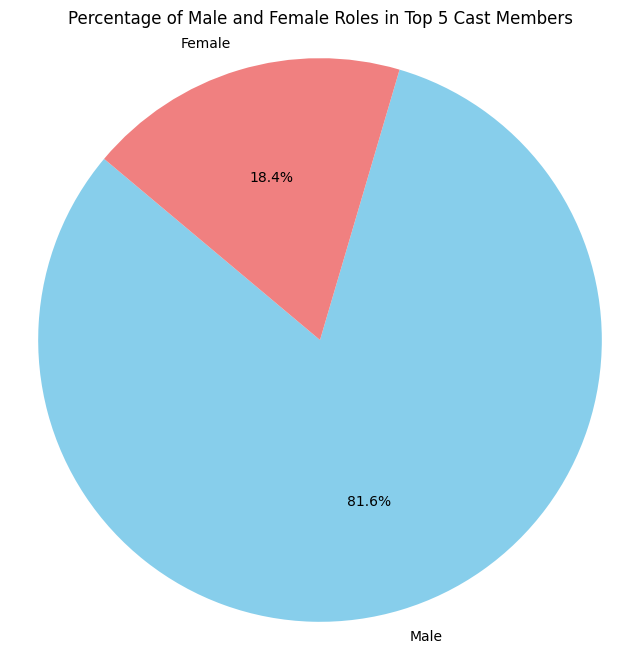

In [127]:
# Extracting top 5 cast members
def extract_top_cast(actors_str, top_n=5):
    try:
        actors = ast.literal_eval(actors_str)
        top_cast = actors[:top_n]
        return [actor['name'] for actor in top_cast]
    except:
        return []

df['top_cast'] = df['rt_actors'].apply(lambda x: extract_top_cast(x, 5))

# Defining male and female names for gender determination (simplified)
male_names = ['John', 'James', 'Robert', 'Michael', 'William', 'David', 'Richard', 'Charles', 'Joseph', 'Thomas']
female_names = ['Mary', 'Patricia', 'Linda', 'Barbara', 'Elizabeth', 'Jennifer', 'Maria', 'Susan', 'Margaret', 'Dorothy']

def determine_gender(name):
    first_name = name.split()[0]
    if first_name in male_names:
        return 'Male'
    elif first_name in female_names:
        return 'Female'
    else:
        return 'Unknown'

# Determining gender for top cast
df['gender'] = df['top_cast'].apply(lambda cast: [determine_gender(name) for name in cast])

# Calculating percentage of male and female roles
male_counts = df['gender'].apply(lambda x: x.count('Male')).sum()
female_counts = df['gender'].apply(lambda x: x.count('Female')).sum()
total = male_counts + female_counts

percent_male = (male_counts / total) * 100
percent_female = (female_counts / total) * 100

# Displaying percentage of male and female roles
labels = ['Male', 'Female']
sizes = [percent_male, percent_female]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female Roles in Top 5 Cast Members')
plt.axis('equal')
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\1763770391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_budget_genre.values, y=avg_budget_genre.index, palette='viridis')


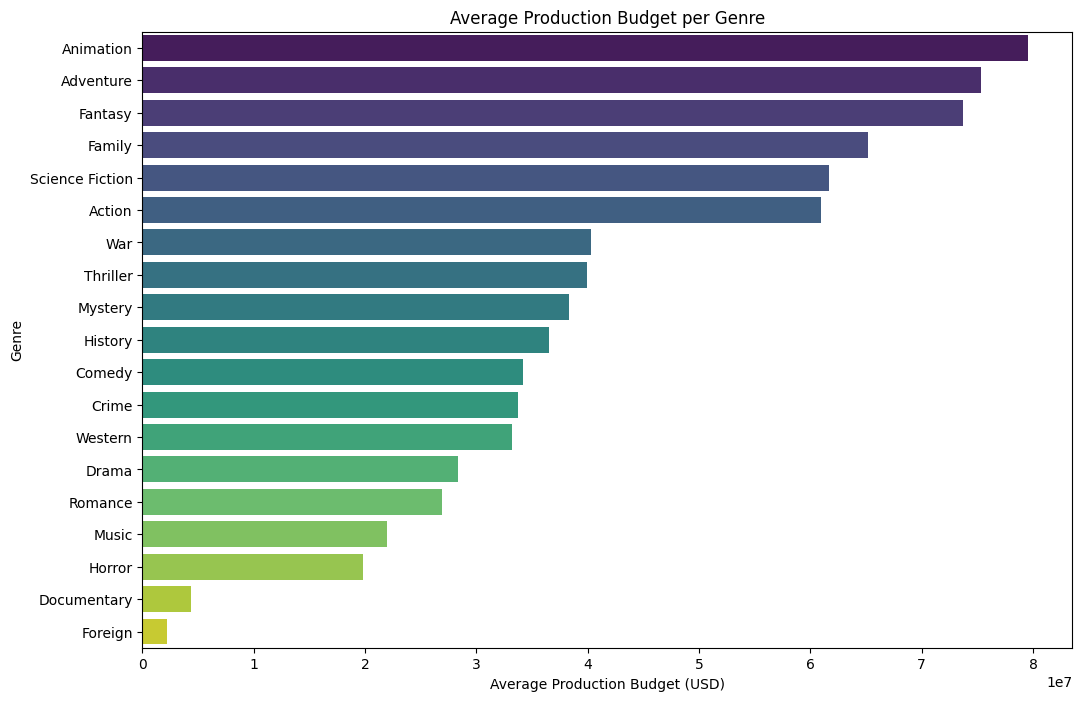

In [128]:
# Calculating average production budget per genre
avg_budget_genre = df.explode('genres_list').groupby('genres_list')['rt_production_budget'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,8))
sns.barplot(x=avg_budget_genre.values, y=avg_budget_genre.index, palette='viridis')
plt.xlabel('Average Production Budget (USD)')
plt.ylabel('Genre')
plt.title('Average Production Budget per Genre')
plt.show()


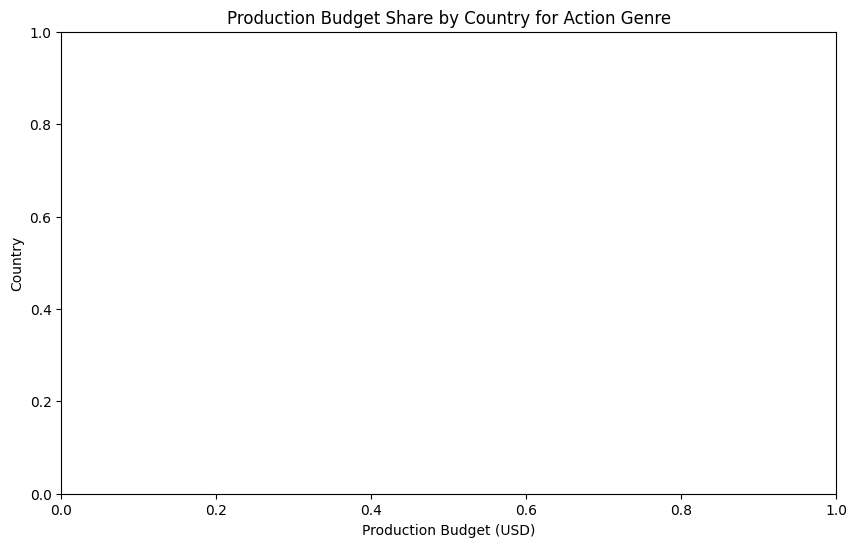

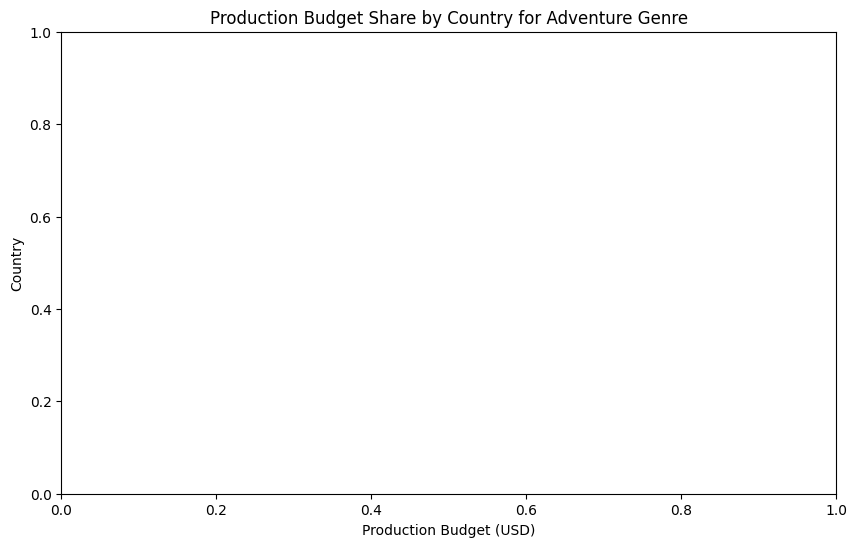

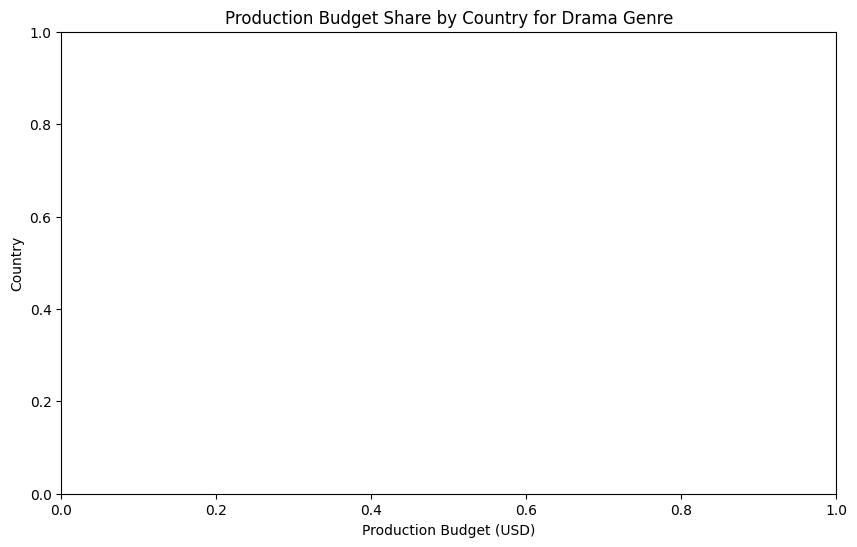

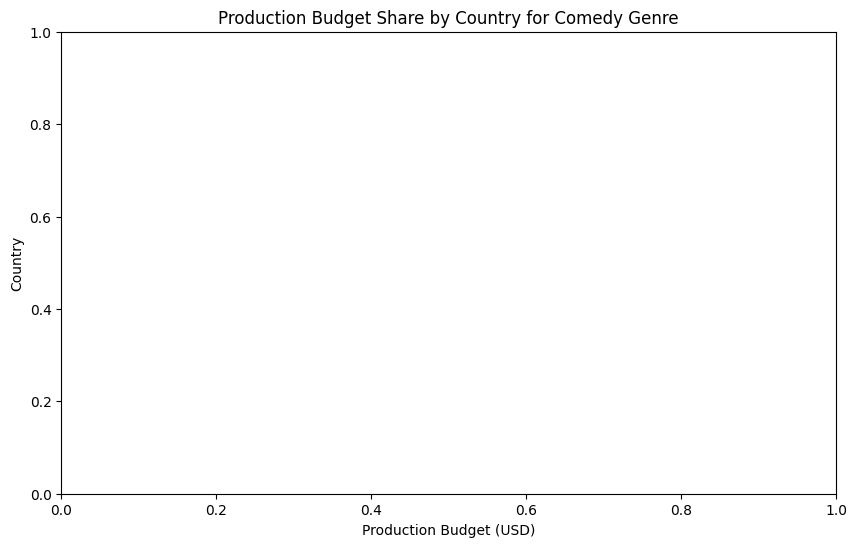

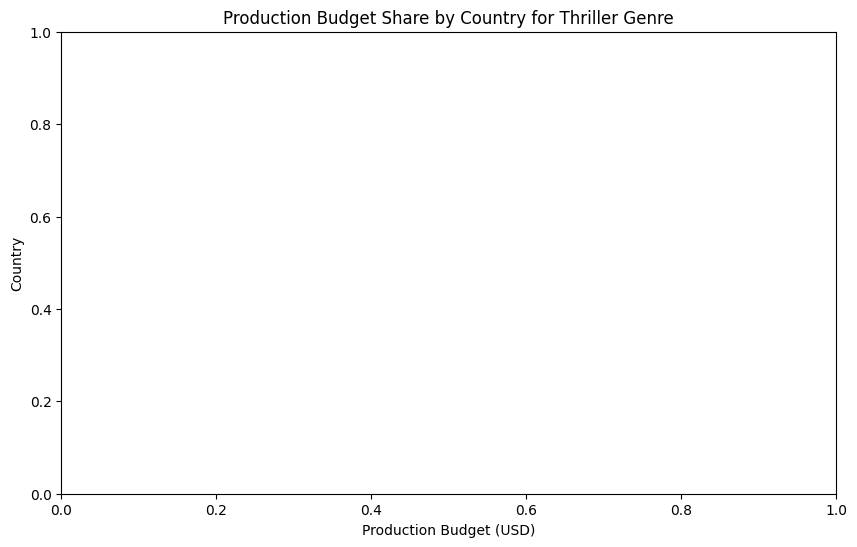

In [129]:
# Identifying top 5 genres by total production budget
total_budget_genre = df.explode('genres_list').groupby('genres_list')['rt_production_budget'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filtering for top 5 genres
df_top5_genres = df[df['genres_list'].isin(total_budget_genre)].copy()

# Exploding countries_list
df_countries = df_top5_genres.explode('countries_list').copy()

# Calculating budget share by country and genre
budget_country_genre = df_countries.groupby(['genres_list', 'countries_list'])['rt_production_budget'].sum().reset_index()

# Plotting budget share by country for each top genre
for genre in total_budget_genre:
    data = budget_country_genre[budget_country_genre['genres_list'] == genre].sort_values(by='rt_production_budget', ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')
    plt.xlabel('Production Budget (USD)')
    plt.ylabel('Country')
    plt.title(f'Production Budget Share by Country for {genre} Genre')
    plt.show()


In [130]:
current_year = 2025
df_last10 = df[df['release_year'] >= (current_year - 10)].copy()

selected_genres = ['Action', 'Drama', 'Comedy']
df_selected_genres = df_last10[df_last10['genres_list'].isin(selected_genres)].copy()

# Group and unstack
movies_count = df_selected_genres.explode('genres_list') \
                .groupby(['release_year', 'genres_list'])['rt_movie_id'] \
                .count() \
                .unstack()

# Convert to numeric (just in case) and fill NaN with 0
movies_count = movies_count.apply(pd.to_numeric, errors='coerce').fillna(0)

print("Movies Count DataFrame:\n")
display(movies_count.head())

# Plot only if it's non-empty and numeric
if not movies_count.empty:
    movies_count.plot(kind='line', figsize=(14,7), marker='o')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.title('Number of Movies Produced in Action, Drama, Comedy Genres (Last 10 Years)')
    plt.legend(title='Genre')
    plt.show()
else:
    print("Error: 'movies_count' DataFrame is empty or non-numeric.")


Movies Count DataFrame:



genres_list
release_year


Error: 'movies_count' DataFrame is empty or non-numeric.


Top 5 Countries with Shortest Average Movie Runtime:
countries_list
Monaco    84.0
Angola    85.0
Iran      89.0
Israel    90.0
Fiji      98.0
Name: rt_runtime, dtype: float64

Top 5 Countries with Longest Average Movie Runtime:
countries_list
Morocco      141.333333
Malta        143.000000
Slovenia     150.000000
Dominica     151.000000
Singapore    172.000000
Name: rt_runtime, dtype: float64


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\1264384641.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_runtime_country.values, y=avg_runtime_country.index, palette='coolwarm')


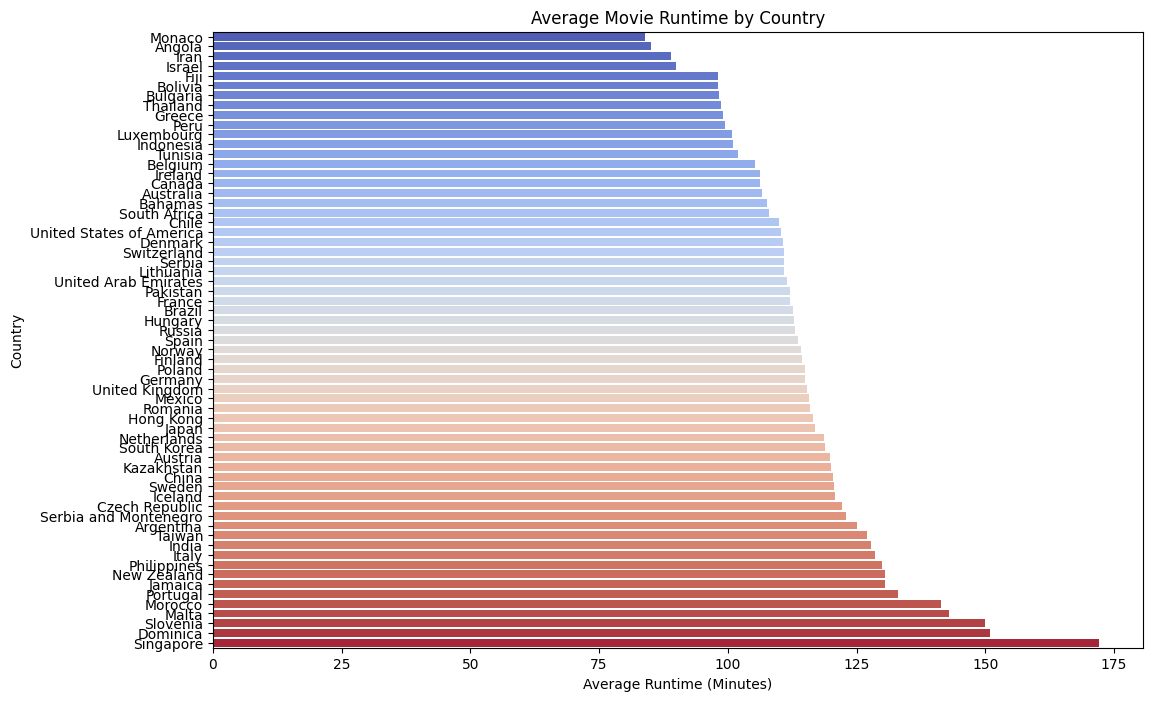

In [131]:
# Exploding countries_list for the entire dataframe
df_countries_all = df.explode('countries_list').copy()

# Filling missing runtime values with mean
df_countries_all['rt_runtime'] = df_countries_all['rt_runtime'].fillna(df_countries_all['rt_runtime'].mean())

# Calculating average runtime by country
avg_runtime_country = df_countries_all.groupby('countries_list')['rt_runtime'].mean().sort_values()

# Displaying top 5 countries with shortest and longest average runtime
print("Top 5 Countries with Shortest Average Movie Runtime:")
print(avg_runtime_country.head(5))

print("\nTop 5 Countries with Longest Average Movie Runtime:")
print(avg_runtime_country.tail(5))

# Plotting
plt.figure(figsize=(12,8))
sns.barplot(x=avg_runtime_country.values, y=avg_runtime_country.index, palette='coolwarm')
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Country')
plt.title('Average Movie Runtime by Country')
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\3263875515.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='pastel')
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

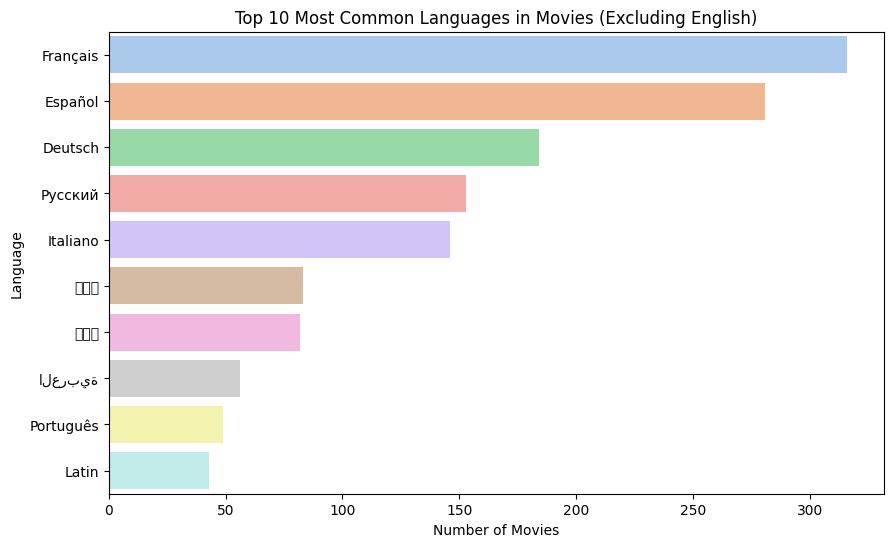

In [132]:
# Exploding languages_list
df_languages = df.explode('languages_list').copy()

# Filtering out English
df_non_english = df_languages[df_languages['languages_list'] != 'English'].copy()

# Counting languages
language_counts = df_non_english['languages_list'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='pastel')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.title('Top 10 Most Common Languages in Movies (Excluding English)')
plt.show()


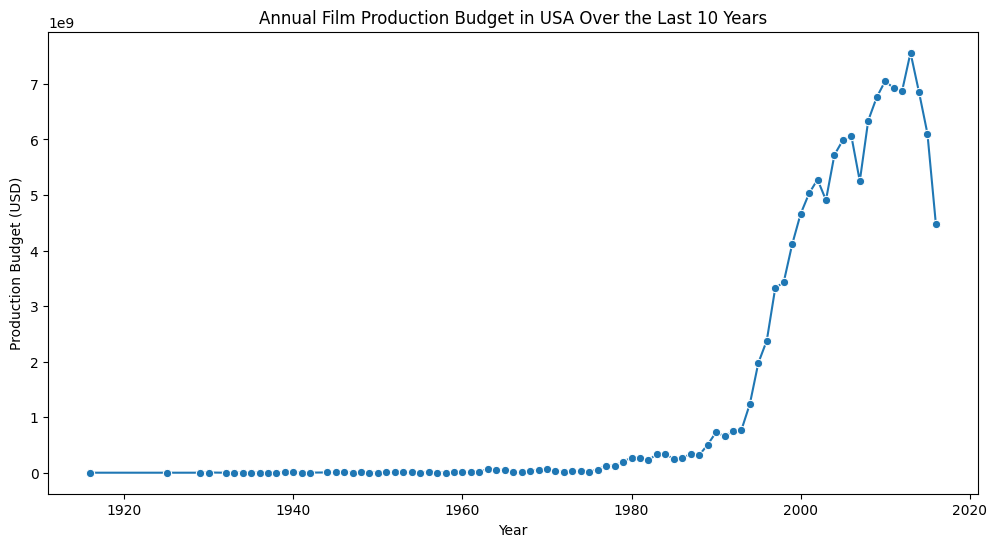

In [133]:
# Filtering for USA
df_us = df_countries_all[df_countries_all['countries_list'] == 'United States of America'].copy()

# Calculating annual budget
annual_budget_us = df_us.groupby('release_year')['rt_production_budget'].sum().reset_index()

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_us, marker='o')
plt.xlabel('Year')
plt.ylabel('Production Budget (USD)')
plt.title('Annual Film Production Budget in USA Over the Last 10 Years')
plt.show()


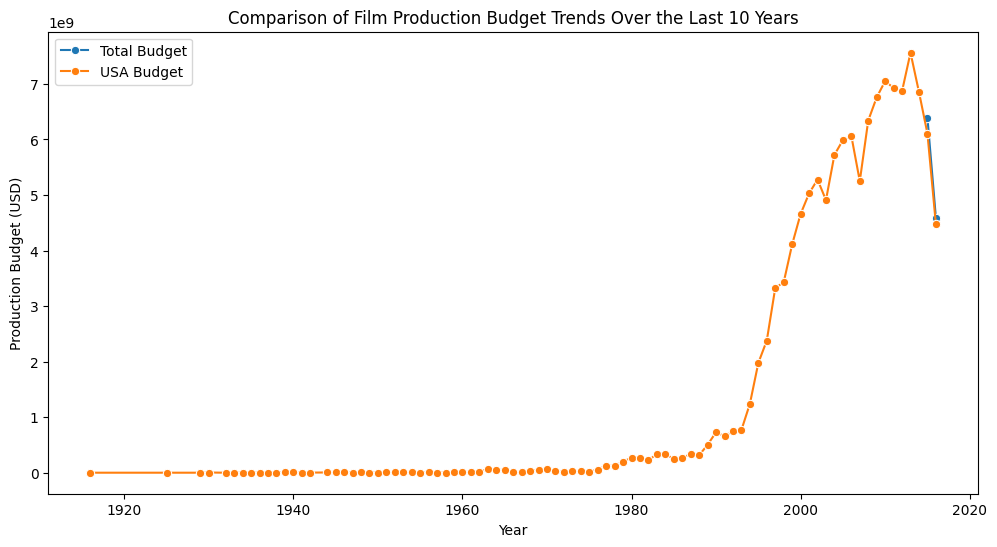

In [134]:
# Calculating total annual budget without country filter
annual_budget_total = df_last10.groupby('release_year')['rt_production_budget'].sum().reset_index()

# Plotting comparison
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_total, marker='o', label='Total Budget')
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_us, marker='o', label='USA Budget')
plt.xlabel('Year')
plt.ylabel('Production Budget (USD)')
plt.title('Comparison of Film Production Budget Trends Over the Last 10 Years')
plt.legend()
plt.show()


In [135]:
# Filtering movies featuring Johnny Depp
df_johnny = df[df['actors_list'].apply(lambda x: 'Johnny Depp' in x)].copy()

# Checking if 'rt_title' exists
if 'rt_title' in df_johnny.columns:
    print("Movies featuring Johnny Depp:")
    print(df_johnny['rt_title'].tolist())
else:
    print("Column 'rt_title' does not exist in the dataframe.")


Column 'rt_title' does not exist in the dataframe.


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\102533275.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_reviews.values, y=top_genres_reviews.index, ax=axes[0], palette='deep')
C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\102533275.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_critics.values, y=top_genres_critics.index, ax=axes[1], palette='muted')


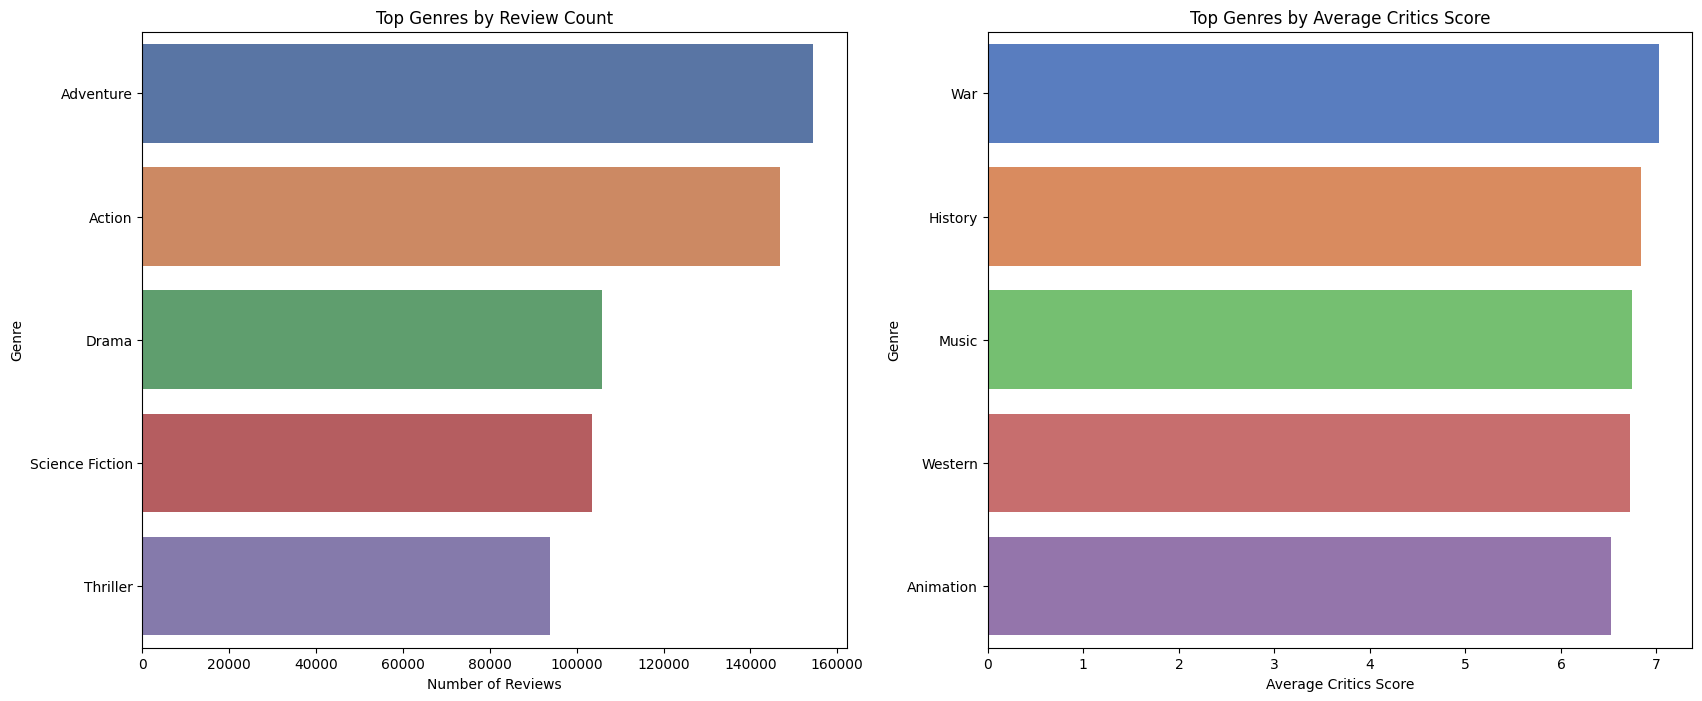

In [136]:
# Calculating top genres by review count
top_genres_reviews = df.explode('genres_list').loc[df['release_year'] >= (current_year - 10)].groupby('genres_list')['rt_review_count'].sum().sort_values(ascending=False).head(5)

# Calculating top genres by average critics score
top_genres_critics = df.explode('genres_list').loc[df['release_year'] >= (current_year - 10)].groupby('genres_list')['rt_critics_score'].mean().sort_values(ascending=False).head(5)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(x=top_genres_reviews.values, y=top_genres_reviews.index, ax=axes[0], palette='deep')
axes[0].set_title('Top Genres by Review Count')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Genre')

sns.barplot(x=top_genres_critics.values, y=top_genres_critics.index, ax=axes[1], palette='muted')
axes[1].set_title('Top Genres by Average Critics Score')
axes[1].set_xlabel('Average Critics Score')
axes[1].set_ylabel('Genre')

plt.show()


In [137]:
y = df['rt_box_office']
columns_to_drop = ['rt_box_office', 'rt_synopsis', 'rt_tagline', 'rt_title', 'rt_website',
                   'rt_genres', 'rt_production_countries', 'rt_languages', 'rt_actors',
                   'top_cast', 'gender', 'genres_list', 'countries_list', 'languages_list', 'actors_list']

X = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, errors='ignore')


In [138]:
# Converting categorical variables using One-Hot Encoding
cat_cols = ['rt_original_language', 'rt_release_status']
for col in cat_cols:
    if col in X.columns:
        X = pd.get_dummies(X, columns=[col], drop_first=True)

# Creating numeric features
df['num_genres'] = df['genres_list'].apply(lambda x: len(x))
df['num_countries'] = df['countries_list'].apply(lambda x: len(x))
df['num_actors'] = df['actors_list'].apply(lambda x: len(x))

X['num_genres'] = df['num_genres']
X['num_countries'] = df['num_countries']
X['num_actors'] = df['num_actors']


In [139]:
print("Data types of features (before final cleanup):")
print(X.dtypes)

# Drop or convert any remaining object-type columns
object_cols = X.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    print(f"\nDropping non-numeric columns: {list(object_cols)}")
    X.drop(columns=object_cols, axis=1, inplace=True, errors='ignore')

# Fill any remaining NaN
X = X.fillna(X.mean())

print("\nData types of features (after final cleanup):")
print(X.dtypes)


Data types of features (before final cleanup):
rt_production_budget            int64
rt_movie_id                     int64
rt_keywords                    object
rt_original_title              object
rt_audience_score             float64
rt_studios                     object
rt_release_date                object
rt_runtime                    float64
rt_title_x                     object
rt_critics_score              float64
rt_review_count                 int64
rt_title_y                     object
rt_staff                       object
release_year                    int32
rt_original_language_cn          bool
rt_original_language_da          bool
rt_original_language_de          bool
rt_original_language_el          bool
rt_original_language_en          bool
rt_original_language_es          bool
rt_original_language_fa          bool
rt_original_language_fr          bool
rt_original_language_he          bool
rt_original_language_hi          bool
rt_original_language_id          bool
rt_

In [140]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# 1) Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

# 2) Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


Linear Regression - MSE: 1.1124727733483592e+16, R2: 0.666920864916116
Random Forest - MSE: 8717066442427536.0, R2: 0.7390072799378686


In [141]:
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_base = RandomForestRegressor(random_state=101)

rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=rf_params,
    n_iter=20,            # reduced for faster runs
    cv=3,
    verbose=2,
    random_state=101,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
print("Best Parameters:")
print(rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}


In [142]:
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest - MSE: {mse_best_rf}, R2: {r2_best_rf}")


Optimized Random Forest - MSE: 8403545410489225.0, R2: 0.7483942345358054


Model Comparison:

                     Model           MSE        R2
0        Linear Regression  1.112473e+16  0.666921
1            Random Forest  8.717066e+15  0.739007
2  Optimized Random Forest  8.403545e+15  0.748394


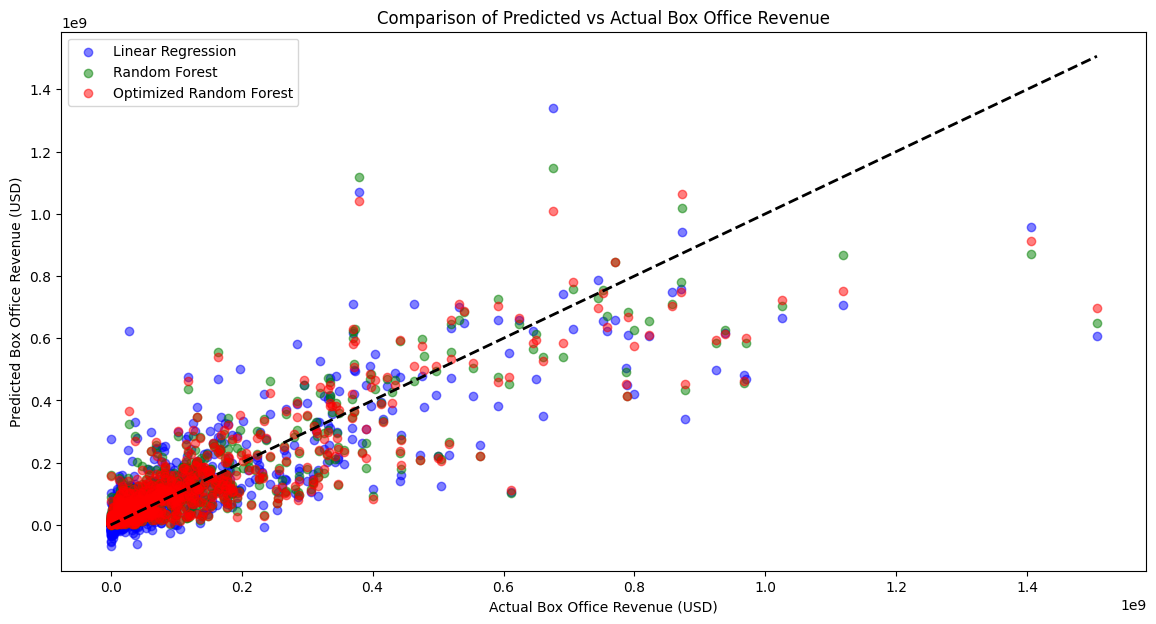

In [143]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Optimized Random Forest'],
    'MSE': [mse_lr, mse_rf, mse_best_rf],
    'R2': [r2_lr, r2_rf, r2_best_rf]
})

print("Model Comparison:\n")
print(comparison)

plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_best_rf, color='red', label='Optimized Random Forest', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Box Office Revenue (USD)')
plt.ylabel('Predicted Box Office Revenue (USD)')
plt.title('Comparison of Predicted vs Actual Box Office Revenue')
plt.legend()
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\1074403766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')


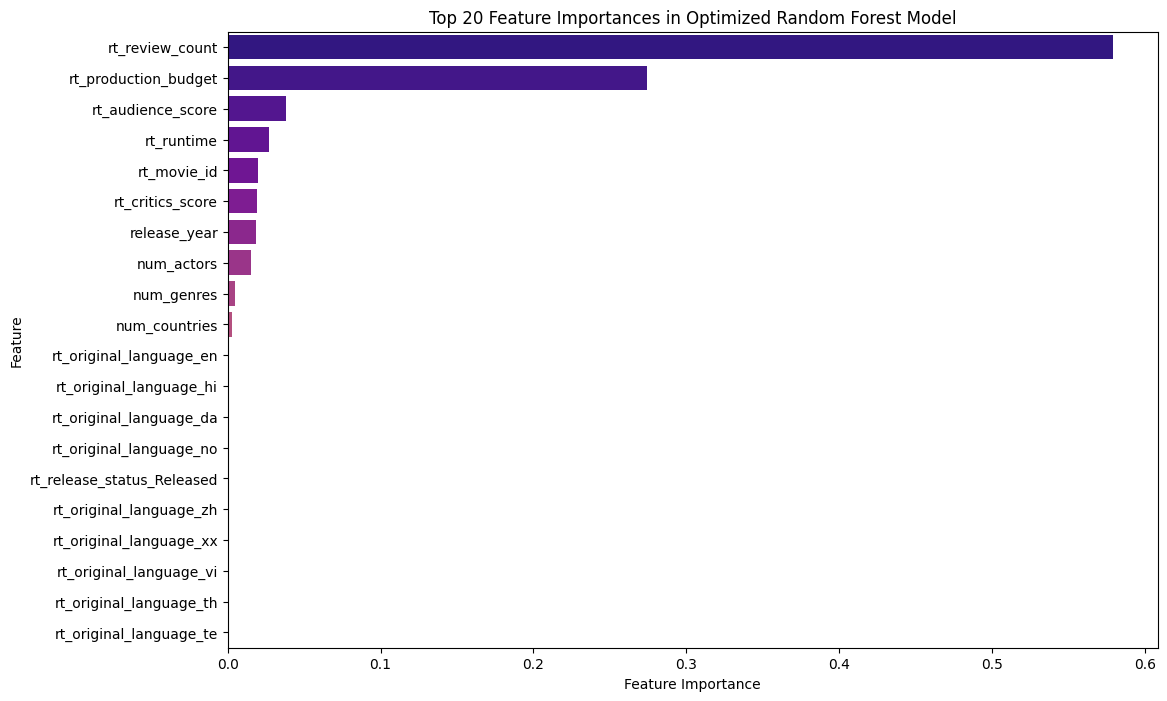

In [144]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances in Optimized Random Forest Model')
plt.show()


In [145]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rt_production_budget     4803 non-null   int64  
 1   rt_genres                4803 non-null   object 
 2   rt_website               1712 non-null   object 
 3   rt_movie_id              4803 non-null   int64  
 4   rt_keywords              4803 non-null   object 
 5   rt_original_language     4803 non-null   object 
 6   rt_original_title        4803 non-null   object 
 7   rt_synopsis              4800 non-null   object 
 8   rt_audience_score        4803 non-null   float64
 9   rt_studios               4803 non-null   object 
 10  rt_production_countries  4803 non-null   object 
 11  rt_release_date          4802 non-null   object 
 12  rt_box_office            4803 non-null   int64  
 13  rt_runtime               4801 non-null   float64
 14  rt_languages            

In [146]:
df_credit.head()

,rt_movie_id,rt_title,rt_actors,rt_staff
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\3524484135.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_budget_genre.values, y=avg_budget_genre.index, palette='viridis')


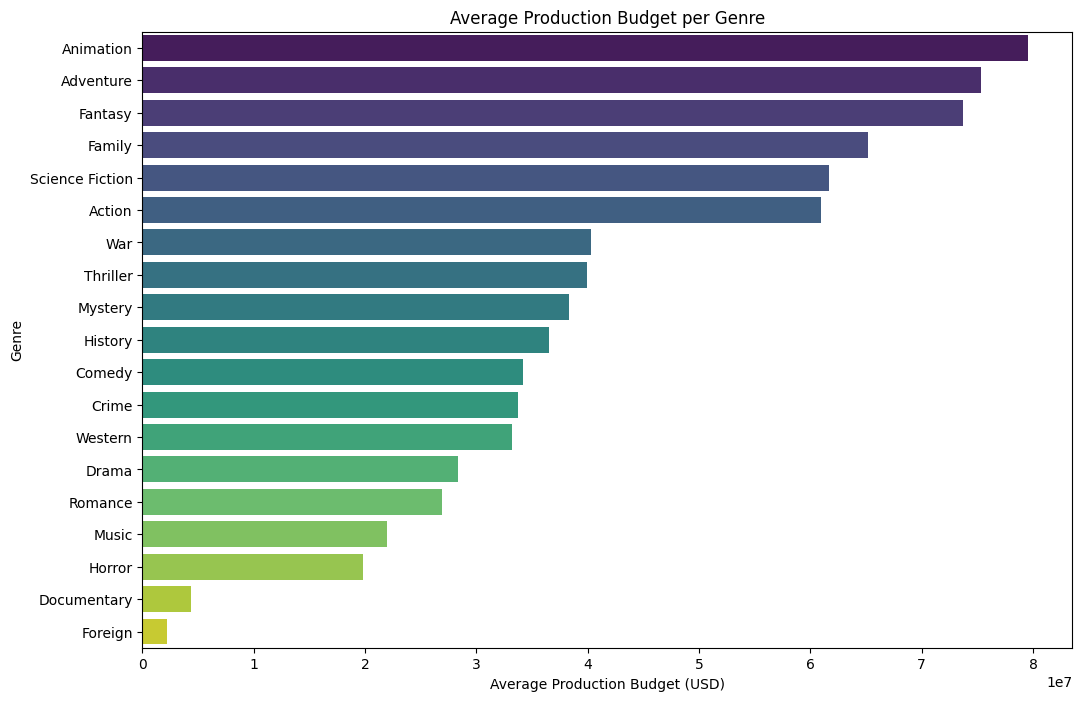

In [147]:
# استخراج ژانرها
def extract_genres(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres]
    except:
        return []

df['genres_list'] = df['rt_genres'].apply(extract_genres)

# ایجاد دیتافریم جدید با هر ژانر در یک ردیف
df_genres = df.explode('genres_list').copy()

# اطمینان از وجود ستون release_year در df_genres
df_genres['release_year'] = df_genres['release_year']

# محاسبه متوسط هزینه برای هر ژانر
avg_budget_genre = df_genres.groupby('genres_list')['rt_production_budget'].mean().sort_values(ascending=False)

# نمایش نتایج
plt.figure(figsize=(12,8))
sns.barplot(x=avg_budget_genre.values, y=avg_budget_genre.index, palette='viridis')
plt.xlabel('Average Production Budget (USD)')
plt.ylabel('Genre')
plt.title('Average Production Budget per Genre')
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


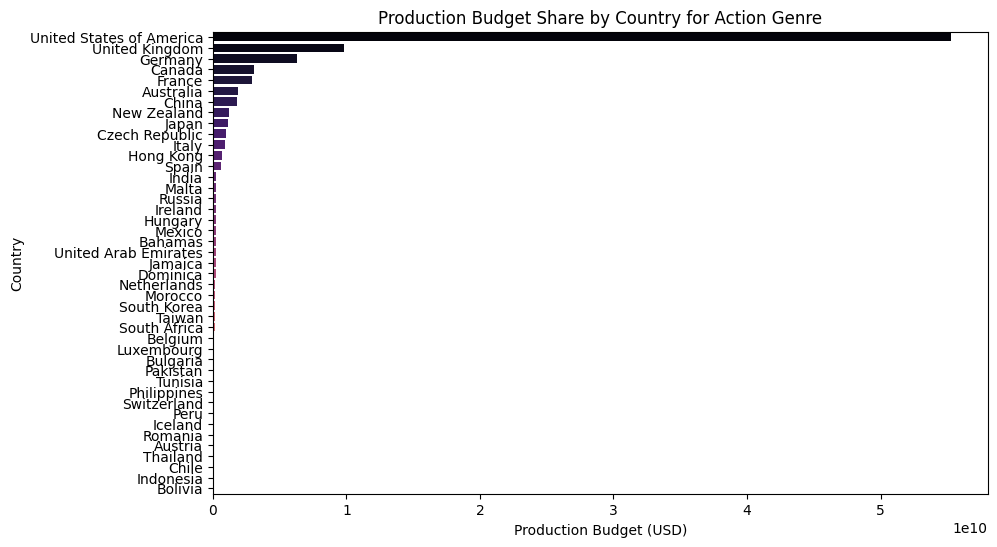

C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


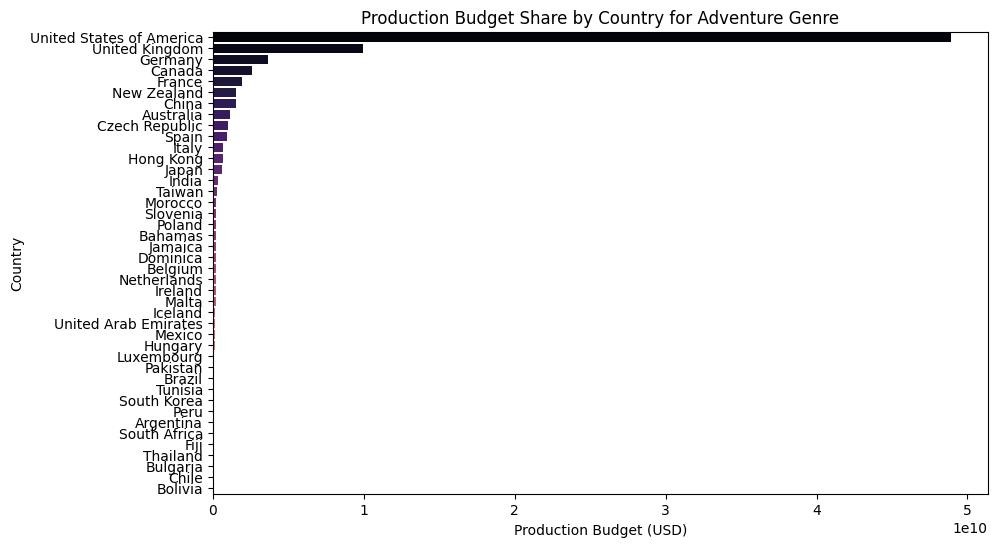

C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


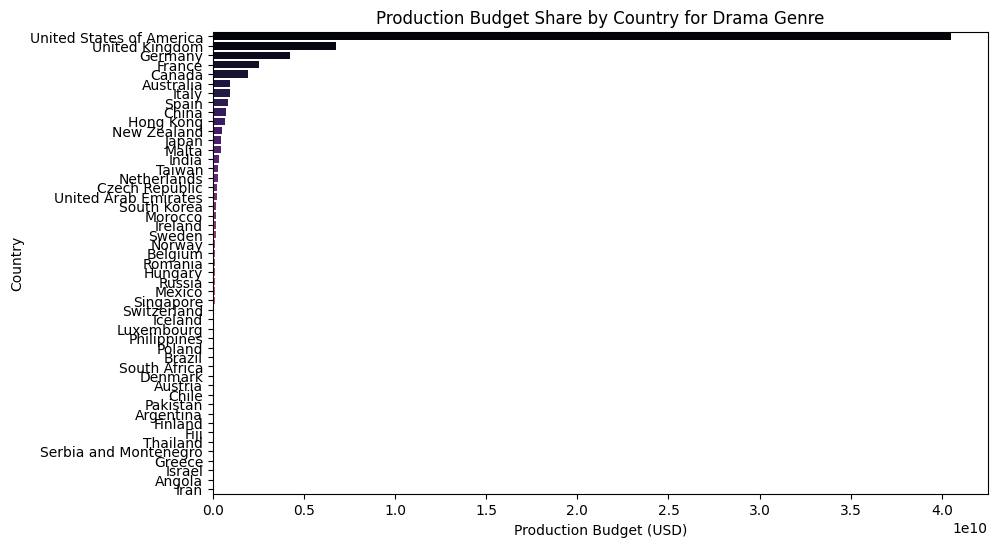

C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


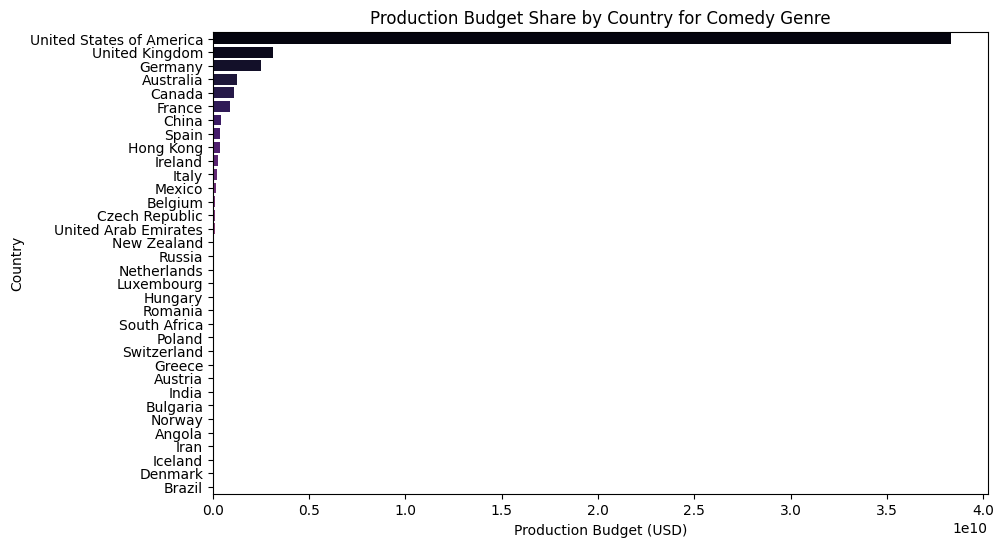

C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\2386552736.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')


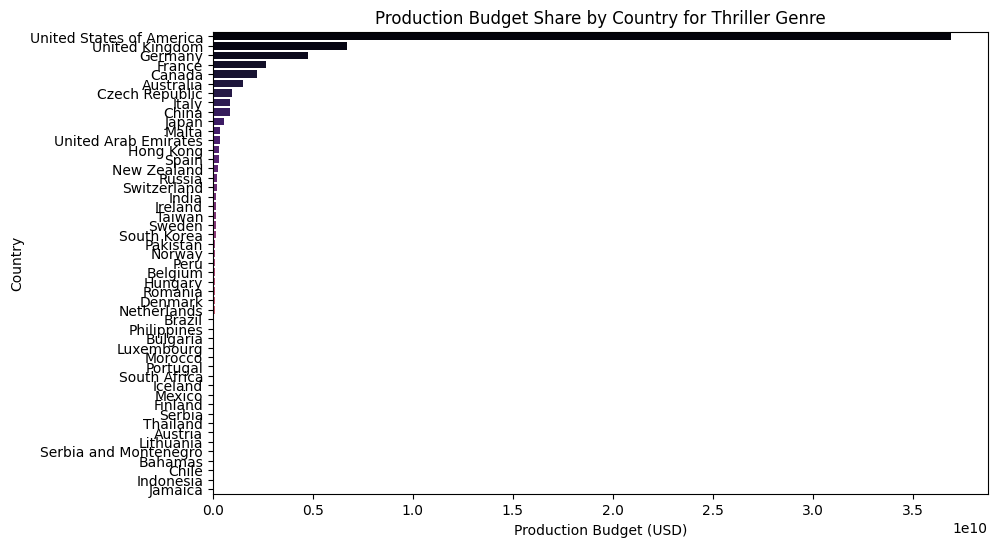

In [148]:
# محاسبه مجموع هزینه برای هر ژانر
total_budget_genre = df_genres.groupby('genres_list')['rt_production_budget'].sum().sort_values(ascending=False).head(5).index.tolist()

# فیلتر ژانرهای پرخرج
df_top5_genres = df_genres[df_genres['genres_list'].isin(total_budget_genre)].copy()

# استخراج کشورها
def extract_countries(countries_str):
    try:
        countries = ast.literal_eval(countries_str)
        return [country['name'] for country in countries]
    except:
        return []

df_top5_genres['countries_list'] = df_top5_genres['rt_production_countries'].apply(extract_countries)

# ایجاد دیتافریم جدید با هر کشور در یک ردیف
df_countries = df_top5_genres.explode('countries_list').copy()

# اطمینان از وجود ستون release_year در df_countries
df_countries['release_year'] = df_countries['release_year']

# محاسبه سهم هر کشور در مجموع هزینه هر ژانر
budget_country_genre = df_countries.groupby(['genres_list', 'countries_list'])['rt_production_budget'].sum().reset_index()

# نمایش سهم کشورهای مختلف برای هر ژانر پرخرج
for genre in total_budget_genre:
    data = budget_country_genre[budget_country_genre['genres_list'] == genre].sort_values(by='rt_production_budget', ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x='rt_production_budget', y='countries_list', data=data, palette='magma')
    plt.xlabel('Production Budget (USD)')
    plt.ylabel('Country')
    plt.title(f'Production Budget Share by Country for {genre} Genre')
    plt.show()


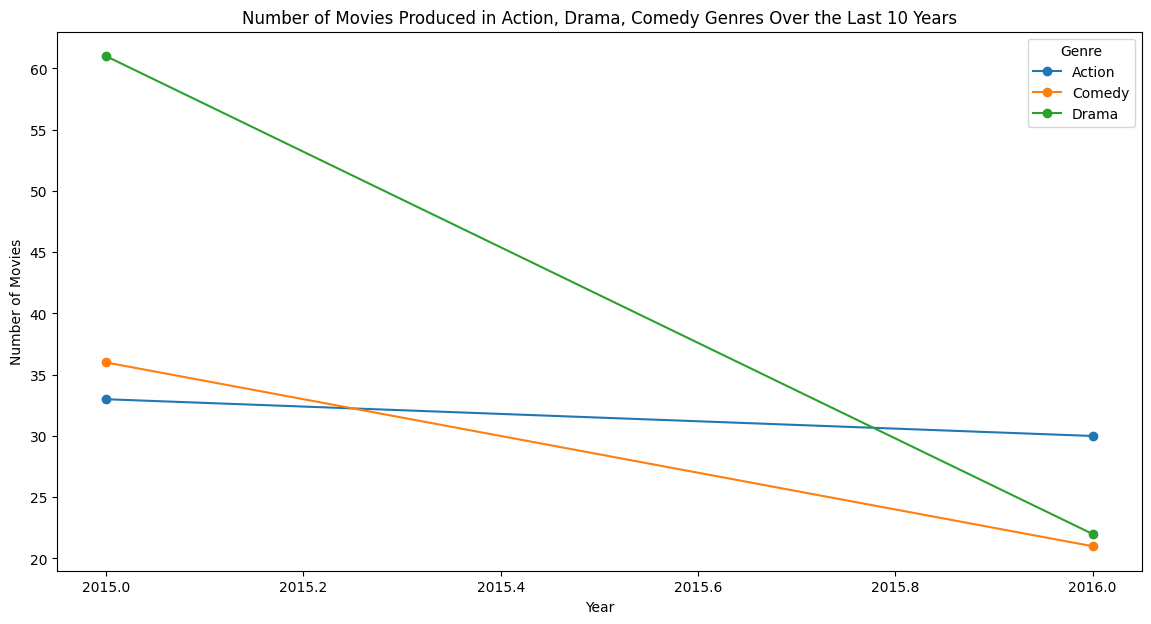

In [149]:
# فیلتر داده‌ها برای ۱۰ سال گذشته
current_year = 2025
df_last10 = df_genres[df_genres['release_year'] >= (current_year - 10)].copy()

# انتخاب ۳ ژانر مورد نظر
selected_genres = ['Action', 'Drama', 'Comedy']
df_selected_genres = df_last10[df_last10['genres_list'].isin(selected_genres)].copy()

# تعداد فیلم‌ها بر اساس سال و ژانر
movies_count = df_selected_genres.groupby(['release_year', 'genres_list'])['rt_movie_id'].count().unstack()

# نمایش نمودار
movies_count.plot(kind='line', figsize=(14,7), marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Produced in Action, Drama, Comedy Genres Over the Last 10 Years')
plt.legend(title='Genre')
plt.show()


Top 5 Countries with Shortest Average Movie Runtime:
countries_list
Angola     85.0
Iran       89.0
Israel     90.0
Bolivia    98.0
Fiji       98.0
Name: rt_runtime, dtype: float64

Top 5 Countries with Longest Average Movie Runtime:
countries_list
Malta        139.444444
Morocco      142.857143
Slovenia     150.000000
Dominica     151.000000
Singapore    172.000000
Name: rt_runtime, dtype: float64


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\2693552662.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_runtime_country.values, y=avg_runtime_country.index, palette='coolwarm')


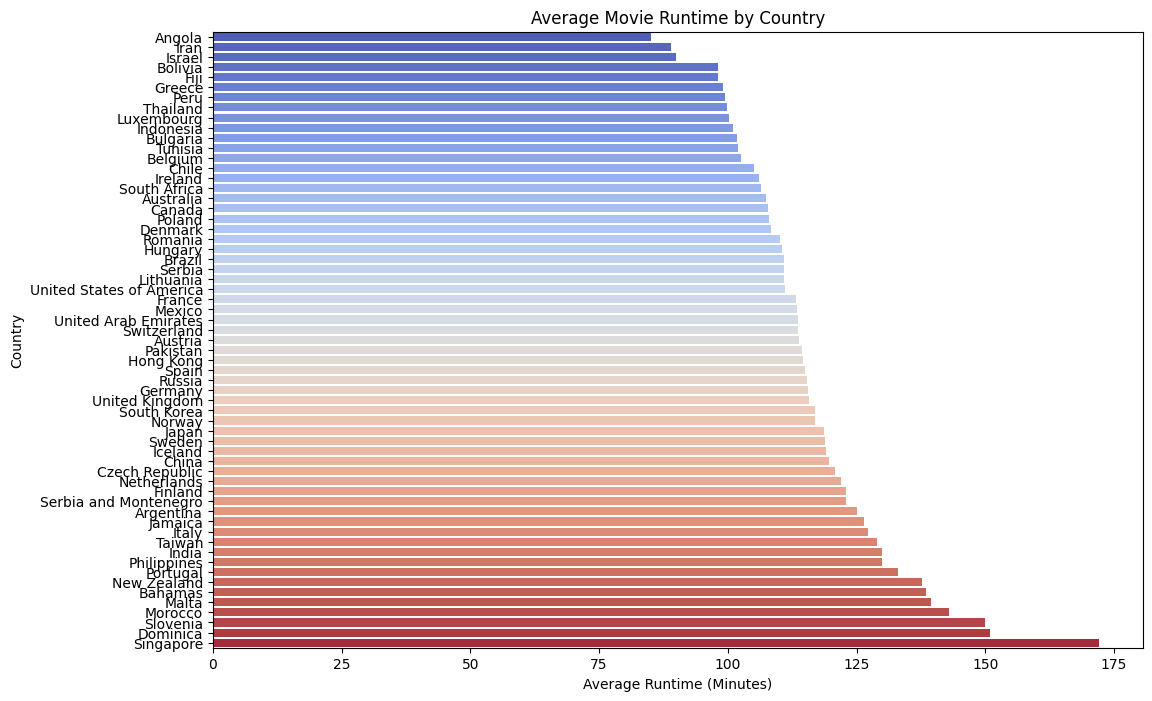

In [150]:
# محاسبه متوسط طول فیلم‌ها برای هر کشور
df_countries['rt_runtime'] = df_countries['rt_runtime'].fillna(df_countries['rt_runtime'].mean())
avg_runtime_country = df_countries.groupby('countries_list')['rt_runtime'].mean().sort_values()

# نمایش ۵ کشور با کوتاه‌ترین و بلندترین متوسط زمان فیلم
print("Top 5 Countries with Shortest Average Movie Runtime:")
print(avg_runtime_country.head(5))

print("\nTop 5 Countries with Longest Average Movie Runtime:")
print(avg_runtime_country.tail(5))

# نمایش نمودار
plt.figure(figsize=(12,8))
sns.barplot(x=avg_runtime_country.values, y=avg_runtime_country.index, palette='coolwarm')
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Country')
plt.title('Average Movie Runtime by Country')
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\549840735.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='pastel')
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

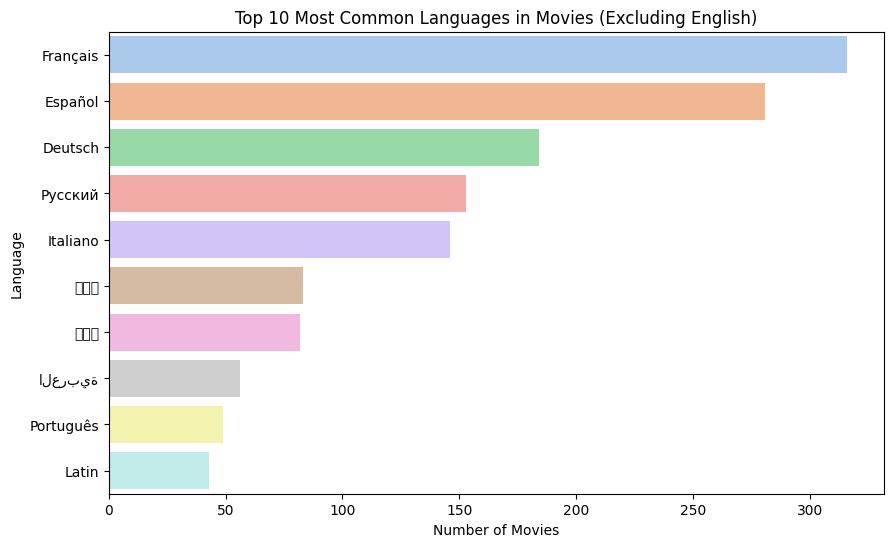

In [151]:
# استخراج زبان‌ها
def extract_languages(languages_str):
    try:
        languages = ast.literal_eval(languages_str)
        return [language['name'] for language in languages]
    except:
        return []

df['languages_list'] = df['rt_languages'].apply(extract_languages)

# ایجاد دیتافریم جدید با هر زبان در یک ردیف
df_languages = df.explode('languages_list').copy()

# فیلتر به غیر از انگلیسی
df_non_english = df_languages[df_languages['languages_list'] != 'English'].copy()

# شمارش زبان‌ها
language_counts = df_non_english['languages_list'].value_counts().head(10)

# نمایش نمودار
plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='pastel')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.title('Top 10 Most Common Languages in Movies (Excluding English)')
plt.show()


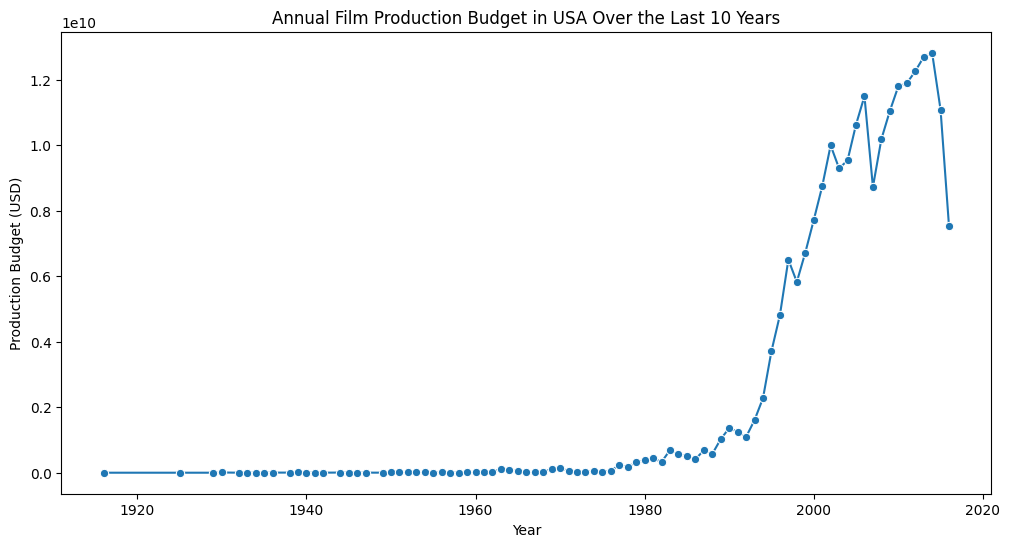

In [152]:
# فیلتر کشور آمریکا
df_us = df_countries[df_countries['countries_list'] == 'United States of America'].copy()

# محاسبه هزینه سالانه
annual_budget_us = df_us.groupby('release_year')['rt_production_budget'].sum().reset_index()

# نمایش نمودار
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_us, marker='o')
plt.xlabel('Year')
plt.ylabel('Production Budget (USD)')
plt.title('Annual Film Production Budget in USA Over the Last 10 Years')
plt.show()


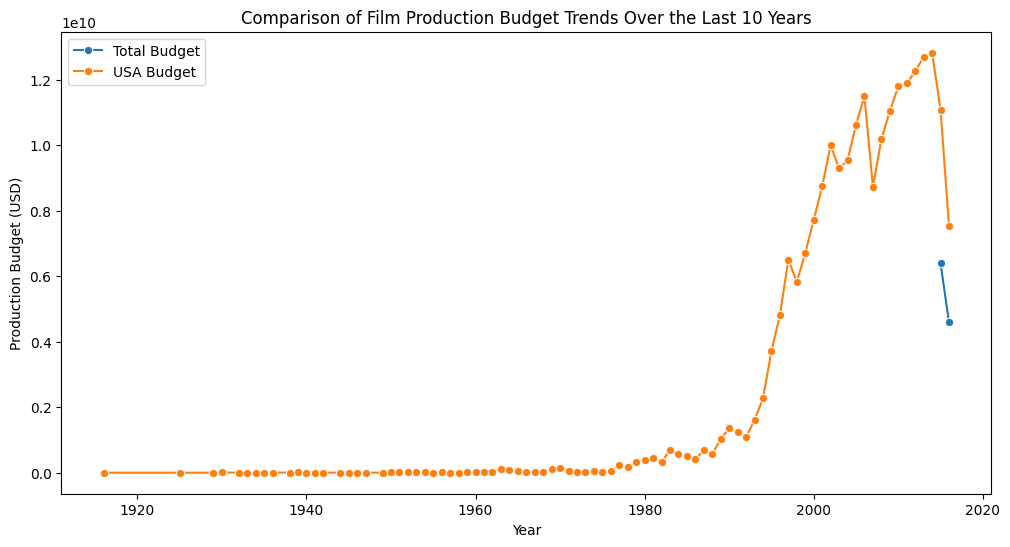

In [153]:
# محاسبه هزینه سالانه بدون فیلتر کردن کشور
annual_budget_total = df[df['release_year'] >= (current_year - 10)].groupby('release_year')['rt_production_budget'].sum().reset_index()

# نمایش نمودار
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_total, marker='o', label='Total Budget')
sns.lineplot(x='release_year', y='rt_production_budget', data=annual_budget_us, marker='o', label='USA Budget')
plt.xlabel('Year')
plt.ylabel('Production Budget (USD)')
plt.title('Comparison of Film Production Budget Trends Over the Last 10 Years')
plt.legend()
plt.show()


In [154]:
# استخراج بازیگران
def extract_actors(actors_str):
    try:
        actors = ast.literal_eval(actors_str)
        return [actor['name'] for actor in actors]
    except:
        return []

df['actors_list'] = df['rt_actors'].apply(extract_actors)

# فیلتر فیلم‌هایی که Johnny Depp در آن‌ها بازی کرده
df_johnny = df[df['actors_list'].apply(lambda x: 'Johnny Depp' in x)].copy()

# نمایش عنوان فیلم‌ها
print("Movies featuring Johnny Depp:")
print(df_johnny['rt_title'].tolist())


Movies featuring Johnny Depp:


KeyError: 'rt_title'

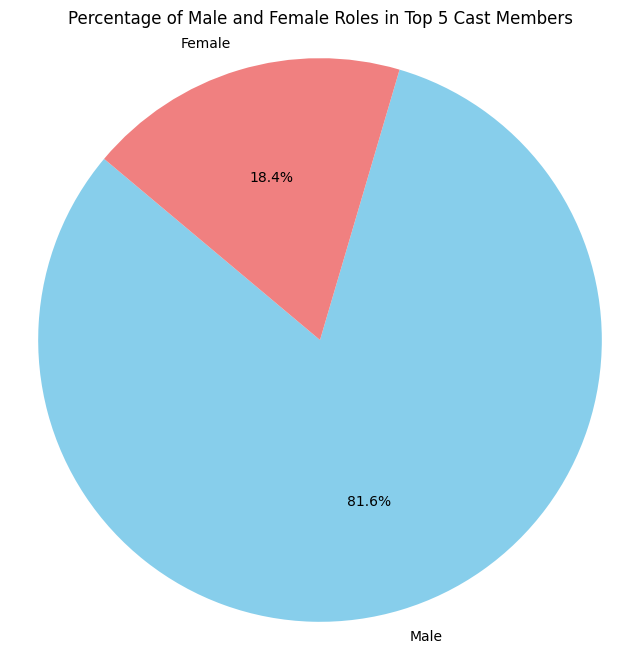

In [ ]:
# استخراج نقش‌های اصلی (اول تا پنجم)
def extract_top_cast(actors_str, top_n=5):
    try:
        actors = ast.literal_eval(actors_str)
        top_cast = actors[:top_n]
        return top_cast
    except:
        return []

df['top_cast'] = df['rt_actors'].apply(lambda x: extract_top_cast(x, 5))

# تعیین جنسیت (فرضی)
male_names = ['John', 'James', 'Robert', 'Michael', 'William', 'David', 'Richard', 'Charles', 'Joseph', 'Thomas']
female_names = ['Mary', 'Patricia', 'Linda', 'Barbara', 'Elizabeth', 'Jennifer', 'Maria', 'Susan', 'Margaret', 'Dorothy']

def determine_gender(name):
    first_name = name.split()[0]
    if first_name in male_names:
        return 'Male'
    elif first_name in female_names:
        return 'Female'
    else:
        return 'Unknown'

# تعیین جنسیت برای هر نقش
df['gender'] = df['top_cast'].apply(lambda cast: [determine_gender(actor['name']) for actor in cast])

# محاسبه درصد نقش‌های مرد و زن
male_counts = df['gender'].apply(lambda x: x.count('Male')).sum()
female_counts = df['gender'].apply(lambda x: x.count('Female')).sum()
total = male_counts + female_counts

percent_male = (male_counts / total) * 100
percent_female = (female_counts / total) * 100

# نمایش نتایج
labels = ['Male', 'Female']
sizes = [percent_male, percent_female]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female Roles in Top 5 Cast Members')
plt.axis('equal')
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\3460862294.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_reviews.values, y=top_genres_reviews.index, ax=axes[0], palette='deep')
C:\Users\Ali\AppData\Local\Temp\ipykernel_36520\3460862294.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_critics.values, y=top_genres_critics.index, ax=axes[1], palette='muted')


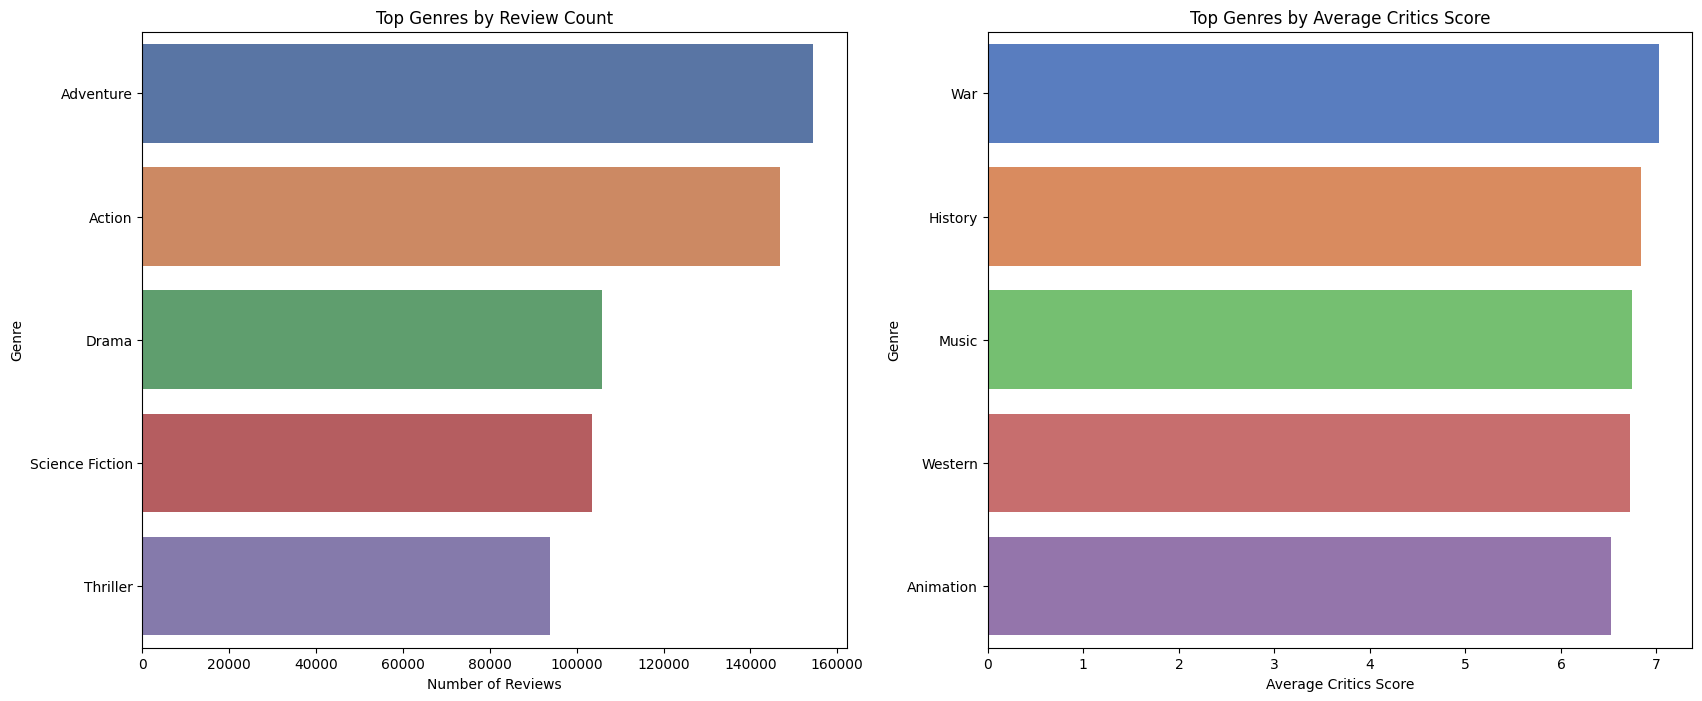

In [ ]:
# محبوب‌ترین ژانر بر اساس تعداد review
top_genres_reviews = df_genres[df_genres['release_year'] >= (current_year - 10)].groupby('genres_list')['rt_review_count'].sum().sort_values(ascending=False).head(5)

# محبوب‌ترین ژانر بر اساس critics_score
top_genres_critics = df_genres[df_genres['release_year'] >= (current_year - 10)].groupby('genres_list')['rt_critics_score'].mean().sort_values(ascending=False).head(5)

# نمایش نمودارها
fig, axes = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(x=top_genres_reviews.values, y=top_genres_reviews.index, ax=axes[0], palette='deep')
axes[0].set_title('Top Genres by Review Count')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Genre')

sns.barplot(x=top_genres_critics.values, y=top_genres_critics.index, ax=axes[1], palette='muted')
axes[1].set_title('Top Genres by Average Critics Score')
axes[1].set_xlabel('Average Critics Score')
axes[1].set_ylabel('Genre')

plt.show()


In [ ]:
# انتخاب ویژگی‌ها و هدف
y = df['rt_box_office']
X = df.drop(['rt_box_office', 'rt_title', 'rt_synopsis', 'rt_tagline', 'rt_website'], axis=1)

# تبدیل متغیرهای کیفی به عددی (One-Hot Encoding)
X = pd.get_dummies(X, columns=['rt_original_language', 'rt_release_status'], drop_first=True)

# مدیریت مقادیر گم شده
X = X.fillna(X.mean())

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


KeyError: "['rt_title', 'rt_website'] not found in axis"

In [ ]:
# تعداد ژانرها
df['num_genres'] = df['genres_list'].apply(lambda x: len(x))
X['num_genres'] = df['num_genres']

# تعداد کشورها
df['num_countries'] = df['countries_list'].apply(lambda x: len(x))
X['num_countries'] = df['num_countries']

# تعداد بازیگران
df['num_actors'] = df['actors_list'].apply(lambda x: len(x))
X['num_actors'] = df['num_actors']


KeyError: 'countries_list'

In [ ]:
# آموزش مدل رگرسیون خطی
lr = LinearRegression()
lr.fit(X_train, y_train)

# پیش‌بینی
y_pred_lr = lr.predict(X_test)

# ارزیابی
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")


ValueError: could not convert string to float: '[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}, {"id": 18, "name": "Drama"}]'

In [ ]:
# آموزش مدل جنگل تصادفی
rf = RandomForestRegressor(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

# پیش‌بینی
y_pred_rf = rf.predict(X_test)

# ارزیابی
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# تعریف فضای هایپرپارامترها
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# ایجاد مدل پایه
rf_base = RandomForestRegressor(random_state=101)

# ایجاد RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=rf_params,
                               n_iter=100, cv=3, verbose=2, random_state=101, n_jobs=-1)

# آموزش مدل
rf_random.fit(X_train, y_train)

# بهترین پارامترها
print("بهترین پارامترها:")
print(rf_random.best_params_)


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
# استفاده از بهترین مدل
best_rf = rf_random.best_estimator_

# پیش‌بینی
y_pred_best_rf = best_rf.predict(X_test)

# ارزیابی
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"مدل جنگل تصادفی بهینه شده - MSE: {mse_best_rf}, R2: {r2_best_rf}")


In [ ]:
# ایجاد دیتافریم مقایسه
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Best Random Forest'],
    'MSE': [mse_lr, mse_rf, mse_best_rf],
    'R2': [r2_lr, r2_rf, r2_best_rf]
})

print(comparison)


In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_best_rf, color='red', label='Best Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('مقادیر واقعی')
plt.ylabel('پیش‌بینی شده')
plt.title('مقایسه پیش‌بینی با مقادیر واقعی')
plt.legend()
plt.show()


In [ ]:
# استخراج اهمیت ویژگی‌ها
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

# نمایش نمودار
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')
plt.xlabel('اهمیت ویژگی‌ها')
plt.ylabel('ویژگی‌ها')
plt.title('اهمیت ویژگی‌ها در مدل جنگل تصادفی بهینه شده')
plt.show()
